In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv('dataset/data.csv')

In [23]:
df.tail()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,popularity_discrete
174384,0.00917,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.00006,6,0.178,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.186,2020,0
174385,0.79500,['Alessia Cara'],0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.00000,4,0.196,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.228,2021,0
174386,0.80600,['Roger Fly'],0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.92000,4,0.113,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.714,2020,0
174387,0.92000,['Taylor Swift'],0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.00000,0,0.113,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.320,2021,2
174388,0.23900,['Roger Fly'],0.677,197710,0.460,0,57tgYkWQTNHVFEt6xDKKZj,0.89100,7,0.215,-12.237,1,Improvisations,0,2020-12-09,0.0258,112.208,0.747,2020,0


In [3]:
df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,5.205305,0.211123,-11.750865,0.702384,25.693381,0.105729,117.006500,0.524533,1977.061764
std,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,3.518292,0.180493,5.691591,0.457211,21.872740,0.182260,30.254178,0.264477,26.907950
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.908000,0.000000,1.000000,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,5.000000,0.138000,-10.836000,1.000000,25.000000,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,8.000000,0.270000,-7.499000,1.000000,42.000000,0.076300,135.011000,0.743000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


Text(0, 0.5, 'Frequency')

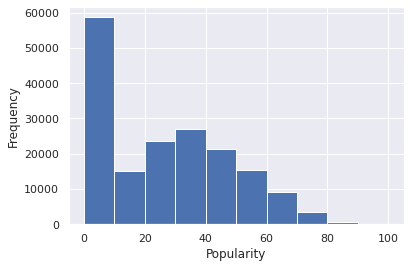

In [11]:
fig, ax = plt.subplots()
ax.hist(df["popularity"])
ax.set_xlabel("Popularity")
ax.set_ylabel("Frequency")

In [21]:
df["popularity_discrete"] = pd.cut(x=df["popularity"], bins=[-1,20,50,100], labels=[0,1,2])

In [22]:
df["popularity_discrete"]

0         0
1         0
2         0
3         0
4         0
         ..
174384    0
174385    0
174386    0
174387    2
174388    0
Name: popularity_discrete, Length: 174389, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [29]:
columns = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness", "loudness", "speechiness", "tempo", "valence"]
X = pd.DataFrame(df, columns=columns)
y = df["popularity_discrete"]

X.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence
0,0.991000,0.598,168333,0.224,0.000522,5,0.3790,-12.628,0.0936,149.976,0.6340
1,0.643000,0.852,150200,0.517,0.026400,5,0.0809,-7.261,0.0534,86.889,0.9500
2,0.993000,0.647,163827,0.186,0.000018,0,0.5190,-12.098,0.1740,97.600,0.6890
3,0.000173,0.730,422087,0.798,0.801000,2,0.1280,-7.311,0.0425,127.997,0.0422
4,0.295000,0.704,165224,0.707,0.000246,10,0.4020,-6.036,0.0768,122.076,0.2990


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [39]:
clf = LogisticRegression(random_state=0, multi_class="multinomial").fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [41]:
accuracy_score(y_test, y_pred)

0.4524628705774414

In [43]:
y_pred2 = clf.predict(X_train)
accuracy_score(y_pred2, y_train)

0.45145544078961514